In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Read the dataset
mydata = pd.read_csv("D:/data ANALYTICS AND SCIENCE/MARKETING Analytics/softdrinks.csv")
mydata

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,7056
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,12490
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,26640
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,41892
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,22923
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,2.52,13760
1076,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,2.18,16309
1077,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330ml,0.85,24378
1078,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5lt,2.17,20691


In [3]:
for i in range(len(mydata['capacity'])):
    if 'lt' in str(mydata['capacity'][i]):
        mydata.at[i, 'capacity'] = float(str(mydata['capacity'][i]).replace('lt', '')) * 1000

print(mydata['capacity'])




0       1500.0
1        330ml
2        500ml
3        500ml
4       1500.0
         ...  
1075    1500.0
1076    1500.0
1077     330ml
1078    1500.0
1079     500ml
Name: capacity, Length: 1080, dtype: object


In [4]:
for i in range(len(mydata['capacity'])):
    if 'ml' in str(mydata['capacity'][i]):
        mydata.at[i, 'capacity'] = float(str(mydata['capacity'][i]).replace('ml', ''))

print(mydata['capacity'])

0       1500.0
1        330.0
2        500.0
3        500.0
4       1500.0
         ...  
1075    1500.0
1076    1500.0
1077     330.0
1078    1500.0
1079     500.0
Name: capacity, Length: 1080, dtype: object


In [5]:
# Select columns and preprocess the data
bd_sub = mydata[['city', 'capacity', 'pop', 'price', 'quantity', 'container', 'brand']].copy()
bd_sub['pop'] = StandardScaler().fit_transform(bd_sub['pop'].values.reshape(-1, 1))
bd_sub['capacity'] = pd.to_numeric(bd_sub['capacity'])
bd_sub['capacity'] = StandardScaler().fit_transform(bd_sub['capacity'].values.reshape(-1, 1))
bd_sub['price'] = StandardScaler().fit_transform(bd_sub['price'].values.reshape(-1, 1))
bd_sub['quantity'] = StandardScaler().fit_transform(bd_sub['quantity'].values.reshape(-1, 1))
bd_sub['city'] = bd_sub['city'].astype('category')
bd_sub['container'] = bd_sub['container'].astype('category')
bd_sub['brand'] = bd_sub['brand'].astype('category')

In [6]:
# Sample 100 rows
bd_sub = bd_sub.sample(n=100)
bd_sub

,city,capacity,pop,price,quantity,container,brand
916,Irakleion,-0.538133,-0.948350,0.134545,-0.590346,glass,adult-cola
360,Athens,1.397520,1.341481,2.486591,-0.964936,plastic,kinder-cola
261,Athens,-0.538133,1.341481,-0.565038,-0.494705,glass,lemon-boost
257,Larisa,1.397520,-0.915769,1.823193,-1.006852,plastic,adult-cola
224,Thessaloniki,1.397520,-0.004694,1.883502,-1.034178,plastic,lemon-boost
...,...,...,...,...,...,...,...
463,Irakleion,-0.538133,-0.948350,0.013927,-0.125989,glass,kinder-cola
426,Larisa,-0.538133,-0.915769,-0.408235,0.513638,glass,orange-power
234,Athens,-0.867194,1.341481,-0.685656,-0.944843,can,orange-power
919,Irakleion,-0.867194,-0.948350,-0.902768,0.411815,can,orange-power


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import pairwise_distances

# Convert categorical variables to one-hot encoding
enc = OneHotEncoder(sparse=False)
encoded_features = enc.fit_transform(bd_sub[['city', 'container', 'brand']])
encoded_bd_sub = np.hstack((encoded_features, bd_sub[['capacity', 'pop', 'price', 'quantity']].values))

# Calculate Gower distance
gower_dist = pairwise_distances(encoded_bd_sub, metric='euclidean')
gower_dist
gower_mat = np.asmatrix(gower_dist)
gower_mat

C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


matrix([[0.        , 4.54560429, 3.12119985, ..., 3.48568548, 2.48769488,
         2.31337572],
        [4.54560429, 0.        , 4.15695962, ..., 4.38092317, 5.454856  ,
         5.34699376],
        [3.12119985, 4.15695962, 0.        , ..., 2.07977256, 3.5053453 ,
         3.39411038],
        ...,
        [3.48568548, 4.38092317, 2.07977256, ..., 0.        , 3.02175158,
         3.08910674],
        [2.48769488, 5.454856  , 3.5053453 , ..., 3.02175158, 0.        ,
         1.67384845],
        [2.31337572, 5.34699376, 3.39411038, ..., 3.08910674, 1.67384845,
         0.        ]])

city              Athens
capacity       -0.867194
pop             1.341481
price          -0.758027
quantity       -0.013532
container            can
brand        lemon-boost
Name: 523, dtype: object
city              Athens
capacity         1.39752
pop             1.341481
price           2.486591
quantity       -0.964936
container        plastic
brand        kinder-cola
Name: 360, dtype: object


C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

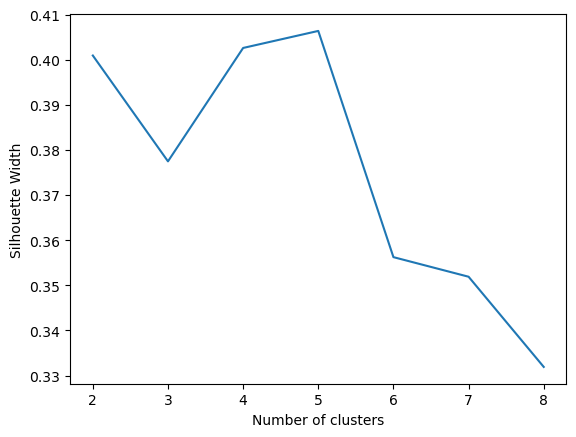

In [10]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Print most similar/dissimilar clients
min_dis = np.min(gower_mat[gower_mat != 0])
min_index = np.where(gower_mat == min_dis)
print(bd_sub.iloc[min_index[0][0], :])

max_dis = np.max(gower_mat)
max_index = np.where(gower_mat == max_dis)
print(bd_sub.iloc[max_index[0][0], :])

# Calculate silhouette width
sil_width = []
for i in range(2, 9):
    kmeans_fit = KMeans(n_clusters=i, random_state=0).fit(gower_dist)
    sil_width.append(silhouette_score(gower_dist, kmeans_fit.labels_))

plt.plot(range(2, 9), sil_width)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Width")
plt.show()


In [12]:
# Summary of each cluster
k = 3
pam_fit = KMeans(n_clusters=k).fit(gower_dist)
pam_results = bd_sub.copy()
pam_results['cluster'] = pam_fit.labels_

# Add categorical variables to the groupby operation
pam_results = pam_results.groupby(['cluster', 'brand', 'city']).apply(lambda x: x.describe())
print(pam_results)



C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                                      capacity       pop     price  quantity  \
cluster brand        city                                                      
0       adult-cola   Irakleion count  1.000000  1.000000  1.000000  1.000000   
                               mean  -0.538133 -0.948350  0.134545 -0.590346   
                               std         NaN       NaN       NaN       NaN   
                               min   -0.538133 -0.948350  0.134545 -0.590346   
                               25%   -0.538133 -0.948350  0.134545 -0.590346   
...                                        ...       ...       ...       ...   
2       orange-power Athens    min   -0.867194  1.341481 -0.987201 -0.966110   
                               25%   -0.867194  1.341481 -0.902768 -0.944843   
                               50%   -0.867194  1.341481 -0.685656 -0.705462   
                               75%   -0.538133  1.341481 -0.227309  0.705044   
                               max   -0.

ANALYSIS ::::::

Cluster 0:

Capacity: The average capacity of products in this cluster is 1.397520, with no variation (std = 0). The minimum capacity is also 1.397520. This suggests that products in this cluster have a consistent capacity.
Popularity: The average popularity is 1.341481, with no variation (std = 0). This indicates that products in this cluster have a similar level of popularity.
Price: The average price is 1.492701, with a moderate variation (std = 0.706443). The minimum price is 0.629078. This cluster may include products with relatively higher prices compared to other clusters.
Quantity: The average quantity is -0.693109, with a moderate variation (std = 0.244035). The minimum quantity is -1.071025. This cluster may contain products with lower quantities compared to other clusters.


Cluster 1:

This cluster does not have any specific information provided in the given table. It might be worth investigating why there is no statistical information available for this cluster.


Cluster 2:

Capacity: The average capacity of products in this cluster is -0.694279, with a moderate variation (std = 0.225315). The minimum capacity is -0.868041. Products in this cluster may have a relatively lower capacity compared to other clusters.
Popularity: The average popularity is 1.341481, with no variation (std = 0). This indicates that products in this cluster have a similar level of popularity.
Price: The average price is -0.898150, with a moderate variation (std = 0.346110). The minimum price is -1.011324. Products in this cluster may have relatively lower prices compared to other clusters.
Quantity: The average quantity is -0.627487, with a moderate variation (std = 0.487334). The minimum quantity is -1.367456. This cluster may contain products with lower quantities compared to other clusters.

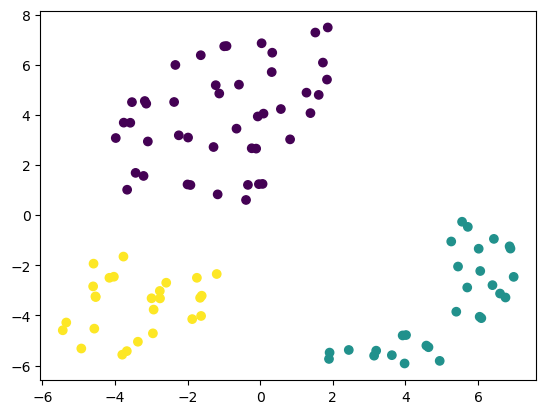

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE embedding
tsne_obj = TSNE(n_components=2, random_state=0)
tsne_data = tsne_obj.fit_transform(encoded_bd_sub)

# Create a DataFrame for the t-SNE results
tsne_data = pd.DataFrame(tsne_data, columns=['X', 'Y'])
tsne_data['cluster'] = pd.Series(pam_fit.labels_)

# Scatter plot of t-SNE results
plt.scatter(tsne_data['X'], tsne_data['Y'], c=tsne_data['cluster'])
plt.show()


In [14]:
# Calculate brand counts within each cluster
bd_sub['cluster'] = pam_fit.labels_

# Calculate brand counts within each cluster
brand_counts = bd_sub.groupby(['cluster', 'brand']).size().reset_index(name='count')

# Identify the most favored brand in each cluster
most_favored_brands = brand_counts.groupby('cluster').apply(lambda x: x.loc[x['count'].idxmax()])

print(most_favored_brands)


         cluster        brand  count
cluster                             
0              0  kinder-cola     14
1              1  lemon-boost     10
2              2  lemon-boost     10


In [15]:
# To determine the number of distinct clusters identified in the dataset
num_clusters = len(np.unique(pam_fit.labels_))
print("Number of distinct clusters:", num_clusters)


Number of distinct clusters: 3


In [17]:
# compare the clusters based on their product attributes using the mean 
# Calculate the mean values of product attributes for each cluster
cluster_attributes = bd_sub.groupby('cluster').mean()

# Display the attribute values for each cluster
print(cluster_attributes)



         capacity       pop     price  quantity
cluster                                        
0       -0.691695 -0.694897 -0.491596  0.253515
1        1.397520  0.118533  1.036266 -0.523596
2       -0.677351  1.341481 -0.483389 -0.180073


Cluster 0:

Capacity: The products in this cluster have a below-average capacity.
Popularity: The products in this cluster have a below-average popularity.
Price: The products in this cluster have a below-average price.
Quantity: The products in this cluster have an above-average quantity.

Cluster 1:

Capacity: The products in this cluster have an above-average capacity.
Popularity: The products in this cluster have an average popularity.
Price: The products in this cluster have an above-average price.
Quantity: The products in this cluster have a below-average quantity.

Cluster 2:

Capacity: The products in this cluster have a below-average capacity.
Popularity: The products in this cluster have a above-average popularity.
Price: The products in this cluster have a below-average price.
Quantity: The products in this cluster have a below-average quantity.

From this information, we can see that the clusters differ in terms of their product attributes. 

In [19]:
# Calculate the count of brands within each cluster
brand_counts = bd_sub.groupby(['cluster', 'brand']).size().reset_index(name='count')

# Identify the most favored brand in each cluster
most_favored_brands = brand_counts.groupby('cluster').apply(lambda x: x.loc[x['count'].idxmax()])

# Calculate the count of cities within each cluster
city_counts = bd_sub.groupby(['cluster', 'city']).size().reset_index(name='count')

# Identify the most common city in each cluster
most_common_cities = city_counts.groupby('cluster').apply(lambda x: x.loc[x['count'].idxmax()])

# Print the most favored brand and most common city for each cluster
print("Most Favored Brands in Each Cluster:")
print(most_favored_brands)
print("\nMost Common Cities in Each Cluster:")
print(most_common_cities)


Most Favored Brands in Each Cluster:
         cluster        brand  count
cluster                             
0              0  kinder-cola     14
1              1  lemon-boost     10
2              2  lemon-boost     10

Most Common Cities in Each Cluster:
         cluster       city  count
cluster                           
0              0  Irakleion     12
1              1     Athens     12
2              2     Athens     26


Cluster 0 RMSE: 1.0008370734014058
Cluster 1 RMSE: 0.42166473172268315
Cluster 2 RMSE: 0.6563394222267016


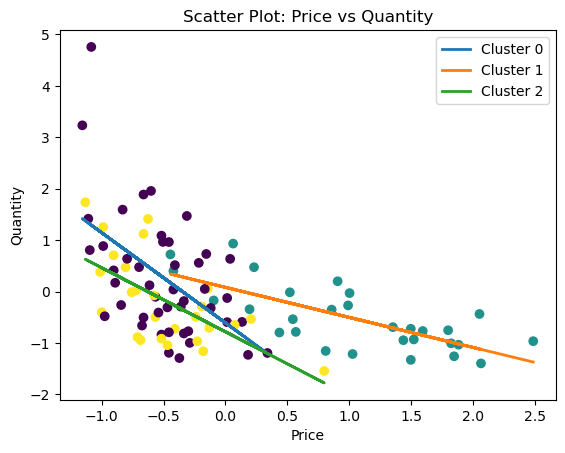

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a scatter plot of price vs quantity
plt.scatter(bd_sub['price'], bd_sub['quantity'], c=bd_sub['cluster'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Scatter Plot: Price vs Quantity')

# Fit a linear regression line for each cluster
clusters = bd_sub['cluster'].unique()
for cluster in clusters:
    cluster_data = bd_sub[bd_sub['cluster'] == cluster]
    X = cluster_data['price'].values.reshape(-1, 1)
    y = cluster_data['quantity'].values.reshape(-1, 1)
    regression = LinearRegression()
    regression.fit(X, y)
    plt.plot(X, regression.predict(X), linewidth=2, label=f'Cluster {cluster}')

    # Calculate RMSE for the cluster
    y_pred = regression.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print(f"Cluster {cluster} RMSE: {rmse}")

plt.legend()
plt.show()


Cluster 0 : has the highest RMSE value of 1.0008. This indicates that the linear regression line fitted for Cluster 0 has a larger deviation from the actual data points compared to the other

Cluster 1 : has the lowest RMSE value of 0.4217. This suggests that the linear regression line fitted for Cluster 1 has a relatively smaller deviation from the actual data points compared to the other clusters. The lower RMSE indicates that the linear regression model provides a better fit to the data in Cluster 1.